In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_url = 'https://raw.githubusercontent.com/aniruddha7599/FoML-Project/refs/heads/main/my_dataframe.csv'
data = pd.read_csv(data_url)

In [3]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 10 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Age                                                                      605 non-null    int64  
 1   Gender (Female=0, Male=1)                                                605 non-null    int64  
 2   Height (cm)                                                              605 non-null    int64  
 3   Weight (kg)                                                              605 non-null    int64  
 4   Body Mass Index                                                          605 non-null    float64
 5   Waist Circumference (cm)                                                 605 non-null    float64
 6   Hip Circumference (cm)                                                   6

In [4]:
# Split the data into features and target variable
X = data.drop(columns=['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)'])
y = data['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)']

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize the Gaussian Naive Bayes model
class_prior = [0.32, 0.68]  # Example: Adjust based on class distribution
model = GaussianNB(priors=class_prior)

# Train the model
model.fit(X_train, y_train)

GaussianNB(priors=[0.32, 0.68])

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [10]:
# Print the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.6923
Precision: 0.7833
Recall: 0.7581
F1 Score: 0.770492

Confusion Matrix:
[[32 26]
 [30 94]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.55      0.53        58
           1       0.78      0.76      0.77       124

    accuracy                           0.69       182
   macro avg       0.65      0.65      0.65       182
weighted avg       0.70      0.69      0.69       182

ROC AUC Score: 0.6649


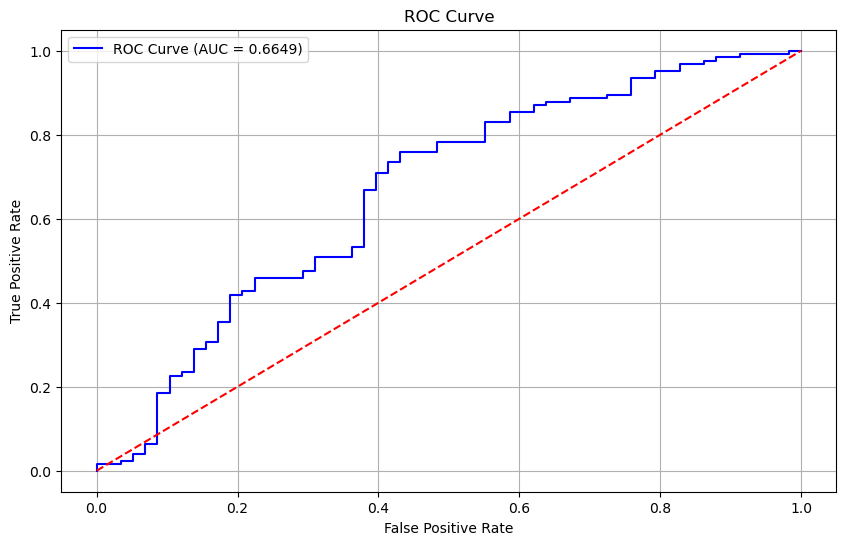

In [11]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

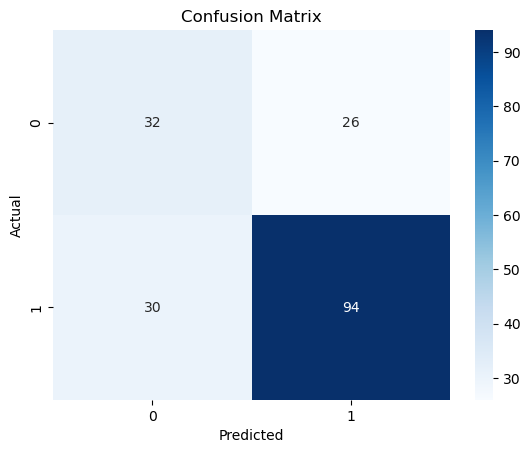

In [12]:
# Heatmap for confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()